In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Data

In [195]:
def calc_rho(T):
    return (1.2625 - 0.0125 * T / 43) * 1000

def calc_eta(r, rho_fl, vel):
    return 2 * g * r **2 * (rho - rho_fl) / (9 * vel)
    
def calc_rs(ds):
    return [x * 0.001 / 2 for x in ds]

def calc_dt_sist(t):
    av = np.average(t)
    return (sum([(av - ti)**2 for ti in t]) / (len(t) * (len(t) - 1)))**0.5

In [196]:
g = 9.8
rho = 2600
l1 = (11.5 - 1.7) * 10 ** (-2)
l2 = 16.4 - 6.6 #l1=l2 = l1

dss1 = [2.1, 2, 2, 2.1]
rs1 = calc_rs(dss1)
ts1 = [[32.56, 32.20], [33.04, 32.83], [32.93, 32.57], [32.54, 32.58]]
dt1 = max([calc_dt_sist(ti) for ti in ts1])
ts1 = [np.average(ts) for ts in ts1]
vs1 = [l1 / ts for ts in ts1]

dss2 = [2.02, 2.06, 2.02, 2]
rs2 = calc_rs(dss2)
ts2 = [[27.16, 25.79], [24.66, 23.49], [22.62, 22.04], [21.33, 21.3]]
dt2 = max([calc_dt_sist(ti) for ti in ts2])
ts2 = [np.average(ts) for ts in ts2]
vs2 = [l1 / ts for ts in ts2]

dss3 = [2.1, 2, 2.12, 2.1]
rs3 = calc_rs(dss3)
ts3 = [[13.5, 12.75], [12.47, 12.78], [12.5, 12.2], [10.1, 11.25]]
dt3 = max([calc_dt_sist(ti) for ti in ts3])
ts3 = [np.average(ts) for ts in ts3]
vs3 = [l1 / ts for ts in ts3]

dss4 = [2.12, 2, 2.02, 2]
rs4 = calc_rs(dss4)
ts4 = [[6, 6.34], [5.81, 6.01], [5.49, 5.60], [5, 5.34]]
dt4 = max([calc_dt_sist(ti) for ti in ts4])
ts4 = [np.average(ts) for ts in ts4]
vs4 = [l1 / ts for ts in ts4]

ts = [ts1, ts2, ts3, ts4]
rs = [rs1, rs2, rs3, rs4]
vs = [vs1, vs2, vs3, vs4]

Ts = [21.60, 30.4, 40, 50]
rho_fluid = [calc_rho(T) for T in Ts]



In [223]:
[round(rho) for rho in rho_fluid]

[1256, 1254, 1251, 1248]

In [198]:
dss1, [round(v * 1000, 2) for v in vs1],

([2.1, 2, 2, 2.1], [3.03, 2.98, 2.99, 3.01])

In [199]:
dss2, [round(v * 1000, 2) for v in vs2],

([2.02, 2.06, 2.02, 2], [3.7, 4.07, 4.39, 4.6])

In [200]:
dss3, [round(v * 1000, 2) for v in vs3],

([2.1, 2, 2.12, 2.1], [7.47, 7.76, 7.94, 9.18])

In [201]:
dss4, [round(v * 1000, 2) for v in vs4]

([2.12, 2, 2.02, 2], [15.88, 16.58, 17.67, 18.96])

In [202]:
vs

[[0.0030265596046942555,
  0.002975557917109458,
  0.0029923664122137408,
  0.00300982800982801],
 [0.003701605288007554,
  0.00407061266874351,
  0.00438871473354232,
  0.004597701149425288],
 [0.007466666666666667,
  0.007762376237623762,
  0.007935222672064778,
  0.009180327868852459],
 [0.01588330632090762,
  0.016582064297800337,
  0.017673579801623086,
  0.01895551257253385]]

# Experimental Data

In [203]:
len(rs), len(rs[0]), rs[0][0]

(4, 4, 0.0010500000000000002)

In [204]:
etas = [[calc_eta(rs[i][j], rho_fluid[j], vs[i][j]) for j in range(len(rs))] for i in range(len(rs[0]))]

In [205]:
[round(np.average(etas[i]), 2) for i in range(len(etas))]

[1.03, 0.72, 0.39, 0.18]

In [206]:
taus = [[2 * rs[i][j]**2 * rho / (9 * etas[i][j]) for j in range(len(rs))] for i in range(len(rs[0]))]


In [218]:
taus, [round(np.average(ta)* 10** 4) for ta in taus]

([[0.0005975422680315393,
   0.0005863566182797239,
   0.0005884491201060576,
   0.0005906103519519988],
  [0.0007308184566142111,
   0.0008021455959726979,
   0.0008630411412213787,
   0.0009021943729559974],
  [0.001474165229627523,
   0.0015296360572707095,
   0.0015604622415767925,
   0.0018014307315744338],
  [0.003135886327206036,
   0.003267623557198427,
   0.0034755110339897907,
   0.003719588599527482]],
 [6, 8, 16, 34])

In [208]:
Re = [[vs[i][j] * rs[i][j] * rho_fluid[j] / etas[i][j] for j in range(len(rs))] for i in range(len(rs[0]))]


In [219]:
Re, [round(np.average(x) * 10**3) for x in Re]

([[0.0037448442010255393,
   0.0037857343977966487,
   0.003812200715027576,
   0.003656748121228824],
  [0.005823491296909178,
   0.006878530390688559,
   0.00811894402456508,
   0.00895947298848027],
  [0.022792334967128364,
   0.025763371925807018,
   0.025290568198949696,
   0.034019511410814295],
  [0.10216462583055859,
   0.11756837484323035,
   0.13166607592540935,
   0.1522902333902508]],
 [4, 7, 27, 126])

In [220]:
Ss = [[vs[i][j] * taus[i][j] for j in range(len(rs))] for i in range(len(rs[0]))]

In [221]:
Ss, [round(np.average(s) * 10**7) for s in Ss]

([[1.8084972905216444e-06,
   1.7447380777717607e-06,
   1.760855382302096e-06,
   1.7776355801995049e-06],
  [2.705201463576683e-06,
   3.2652240251432772e-06,
   3.7876413721314427e-06,
   4.148020105544816e-06],
  [1.1007100381218838e-05,
   1.1873610583170656e-05,
   1.2382615358261188e-05,
   1.6537724748880048e-05],
  [4.980824312255941e-05,
   5.4183943926471376e-05,
   6.142472161064012e-05,
   7.050670846299677e-05]],
 [18, 35, 130, 590])

# ERRORS

In [212]:
dr = 0.02 * 10**(-3)
dl = 10**(-3)
dT = 0.5

min_t = min([min(t) for t in ts])
dt = 0.01
dt_sist = max(dt1, dt2, dt3, dt4)
sigma_t = (dt **2 + dt_sist **2)**0.5

eps_v = ((sigma_t / min_t)**2 + (dl / l1)**2)**0.5

min_r = min([min(r) for r in rs])
min_v = min(min(v) for v in vs)
eps_eta = ((2 * dr / min_r)**2 + (eps_v)**2)**0.5


In [227]:
sigma_t, eps_v, eps_eta

(0.6850729888121416, 0.13290159194993897, 0.13879060898644435)

In [4]:
0.13879 * 1.028

0.14267612

In [214]:
min_t

5.17

In [215]:
sigma_v

0.9097759948700529

# Plot

In [216]:
x = [10**5 / (273 + T) for T in Ts]
y = [np.log(np.average(eta)) for eta in etas]

dx = [dT * 10**5 / (273 + T)**2 for T in Ts]
dy = [eps_eta] * len(y)

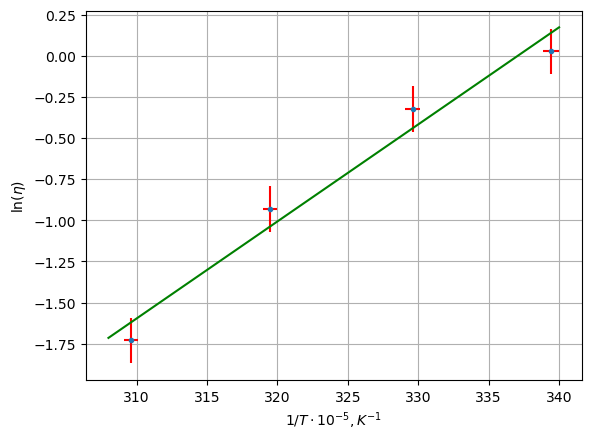

In [217]:
fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=dy, xerr=dx, fmt='.', ecolor='red')
#ax.plot(x, y, 'ro-')
#plt.scatter(x, y, marker='o', color='red')

model1 = np.poly1d(np.polyfit(x, y, 1))
polyline = np.linspace(308, 340)
plt.plot(polyline, model1(polyline), color = 'green')


#ax.set_title('График зависимости $ln(\eta) (1/T)$')
plt.grid()

plt.xlabel('$1/T \cdot 10^{-5}, K^{-1}$')
plt.ylabel('$\ln(\eta)$')

#plt.show()
plt.savefig('plot.png')

In [185]:
print(model1)

 
0.05901 x - 19.23


In [228]:
5901 * 1.38 * 10**(-23) / (1.6 * 10**(-19))

0.5089612499999999

In [229]:
x[0]

339.44331296673454

In [225]:
[round(np.average(eta), 3) for eta in etas]

[1.028, 0.723, 0.395, 0.177]

In [232]:
(dy[0] / min(dx)) * 1.38 * 10**(-23) / (1.6 * 10**(-19))

2.4977802392533142e-05

In [5]:
(825 * (4 / (6 * 10 ** (23)))) / (1.6 * 10 ** (-19))

0.034375

In [1]:
eps_eta

NameError: name 'eps_eta' is not defined